<a href="https://colab.research.google.com/github/AminaZahid/Machine-Translation-using-LSTM/blob/main/Machine_Translation_LSTM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

import re
from nltk.corpus import stopwords

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
# Reading dataset
df = pd.read_csv("/content/drive/MyDrive/eng_-french.csv",names=['english','french'])
print(df.head(5))

print(f"\n\n Shape of the data >>{df.shape}")
df.sample(5)

                   english                  french
0  English words/sentences  French words/sentences
1                      Hi.                  Salut!
2                     Run!                 Cours !
3                     Run!                Courez !
4                     Who?                   Qui ?


 Shape of the data >>(175622, 2)


,english,french
39877,Do I look busy to you?,"Ai-je l'air occupé, selon toi ?"
172906,"I've just renewed my passport, so it's good fo...","Je viens juste de renouveler mon passeport, il..."
101797,He carried six boxes at a time.,Il a porté six boîtes à la fois.
172049,"Once you've formed a bad habit, you can't get ...","Une fois que vous avez une mauvaise habitude, ..."
76829,I'm afraid I caught a cold.,Je crains de m'être enrhumé.


In [4]:
# Unique values
print("Unique values before dropping duplicates")
print(df.english.nunique())
print(df.french.nunique())

df.drop_duplicates(subset=['english'],inplace=True)
df.drop_duplicates(subset=['french'],inplace=True)

print("\n\nUnique values before dropping duplicates")
print(df.english.nunique())
print(df.french.nunique())

Unique values before dropping duplicates
123101
165976


Unique values before dropping duplicates
116544
116544


In [5]:
# Null values
print("Checking NA values\n")
print(df.isnull().any(),'\n')
print(df.isnull().sum())

Checking NA values

english    False
french     False
dtype: bool 

english    0
french     0
dtype: int64


In [6]:
print("before preprocessing")
df.tail(3)

before preprocessing


,english,french
175619,Death is something that we're often discourage...,La mort est une chose qu'on nous décourage sou...
175620,Since there are usually multiple websites on a...,Puisqu'il y a de multiples sites web sur chaqu...
175621,If someone who doesn't know your background sa...,Si quelqu'un qui ne connaît pas vos antécédent...


In [7]:
import nltk

In [8]:
# Pre-processing
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
#eng_stopwords = set(stopwords.words("english"))

#language => either 'english' or 'french'
def preprocess(sentence,language):
    sentence = sentence.lower()
    if language == "english":
        sentence = ' '.join([contractions[word] if word in contractions else word for word in sentence.split()])
#         sentence = ' '.join([word for word in sentence.split() if word not in eng_stopwords])
    sentence = re.sub(r"[.'!#$%&\'()*+,-./:;<=>?@[\\]^ `{|}~]"," ",sentence)
    sentence = ' '.join([word for word in sentence.split()])

    return sentence

In [9]:
df.english = df.english.apply(lambda x:preprocess(x,'english'))
df.french = df.french.apply(lambda x:preprocess(x,'french'))

print(df.shape,'\n')
df.info()

(116544, 2) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116544 entries, 0 to 175621
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  116544 non-null  object
 1   french   116544 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [10]:
print("after preprocessing")
df.tail(6)

after preprocessing


,english,french
175616,we need to uphold laws against discrimination ...,nous devons faire respecter les lois contre la...
175617,"top-down economics never works, said obama. ""t...","« l'économie en partant du haut vers le bas, ç..."
175618,a carbon footprint is the amount of carbon dio...,une empreinte carbone est la somme de pollutio...
175619,death is something that we are often discourag...,la mort est une chose qu'on nous décourage sou...
175620,since there are usually multiple websites on a...,puisqu'il y a de multiples sites web sur chaqu...
175621,if someone who does not know your background s...,si quelqu'un qui ne connaît pas vos antécédent...


In [11]:
# Tokenizing
df["french_input"] = df.french.apply(lambda x:'sostoken ' + x)
df["french_label"] = df.french.apply(lambda x:x + ' eostoken')

encoder_input = np.array(df.english)
decoder_input = np.array(df.french_input)
decoder_label = np.array(df.french_label)


indices = np.arange(116544)
np.random.shuffle(indices)

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_label = decoder_label[indices]

df.head()

,english,french,french_input,french_label
0,english words/sentences,french words/sentences,sostoken french words/sentences,french words/sentences eostoken
1,hi.,salut!,sostoken salut!,salut! eostoken
2,run!,cours !,sostoken cours !,cours ! eostoken
4,who?,qui ?,sostoken qui ?,qui ? eostoken
5,wow!,ça alors !,sostoken ça alors !,ça alors ! eostoken


In [12]:
total = df.shape[0]
test_size = 0.3

train_encoder_input = encoder_input[:-int(total*test_size)]
train_decoder_input = decoder_input[:-int(total*test_size)]
train_decoder_label = decoder_label[:-int(total*test_size)]

test_encoder_input = encoder_input[-int(total*test_size):]
test_decoder_input = decoder_input[-int(total*test_size):]
test_decoder_label = decoder_label[-int(total*test_size):]

print("train dataset shape")
print(train_encoder_input.shape)
print(train_decoder_input.shape)
print(train_decoder_label.shape)

print("\n\ntest dataset shape")
print(test_encoder_input.shape)
print(test_decoder_input.shape)
print(test_decoder_label.shape)

train dataset shape
(81581,)
(81581,)
(81581,)


test dataset shape
(34963,)
(34963,)
(34963,)


In [13]:
eng_tok = Tokenizer()
eng_tok.fit_on_texts(train_encoder_input)
print(f"Number of unique words used in english sentences >> {len(eng_tok.index_word)}")

fr_tok = Tokenizer()
fr_tok.fit_on_texts(train_decoder_input)
fr_tok.fit_on_texts(train_decoder_label)
print(f"Number of unique words used in french sentences >> {len(fr_tok.index_word)}")

Number of unique words used in english sentences >> 12592
Number of unique words used in french sentences >> 21178


In [14]:
total_counts = 0
rare_counts = 0
total_freq = 0
rare_freq = 0

least_occurence = 3
for k,v in eng_tok.word_counts.items():
    total_counts +=1
    total_freq += v
    if v < least_occurence:
        rare_counts+=1
        rare_freq += v

print("="*25,"english","="*25)
print(f"{rare_counts} of {total_counts} words are used less than {least_occurence}times,")
print(f"which is only {np.round(rare_counts/total_counts*100)}% of total words used")
print(f"But they occupy {np.round(rare_freq/total_freq*100)}% of total frequency ")

========================= english =========================
6598 of 12592 words are used less than 3times,
which is only 52.0% of total words used
But they occupy 2.0% of total frequency 


In [15]:
total_counts = 0
rare_counts = 0
total_freq = 0
rare_freq = 0

least_occurence = 3
for k,v in fr_tok.word_counts.items():
    total_counts +=1
    total_freq += v
    if v < least_occurence:
        rare_counts+=1
        rare_freq += v

print("="*25,"french","="*25)
print(f"{rare_counts} of {total_counts} words are used less than {least_occurence}times,")
print(f"which is only {np.round(rare_counts/total_counts*100)}% of total words used")
print(f"But they occupy {np.round(rare_freq/total_freq*100)}% of total frequency ")

========================= french =========================
9296 of 21178 words are used less than 3times,
which is only 44.0% of total words used
But they occupy 1.0% of total frequency 


In [16]:
eng_word_size = 6000
eng_vocab_size = eng_word_size+1
fr_word_size = 12000
fr_vocab_size = fr_word_size+1

eng_tok = Tokenizer(num_words=eng_word_size)
eng_tok.fit_on_texts(train_encoder_input)

train_encoder_input = eng_tok.texts_to_sequences(train_encoder_input)
test_encoder_input = eng_tok.texts_to_sequences(test_encoder_input)

fr_tok = Tokenizer(num_words=fr_word_size)
fr_tok.fit_on_texts(train_decoder_input)
fr_tok.fit_on_texts(train_decoder_label)

train_decoder_input = fr_tok.texts_to_sequences(train_decoder_input)
train_decoder_label = fr_tok.texts_to_sequences(train_decoder_label)

test_decoder_input = fr_tok.texts_to_sequences(test_decoder_input)
test_decoder_label = fr_tok.texts_to_sequences(test_decoder_label)

english
mean >>  6.573650727497824
french
mean >>  7.7804513305794245


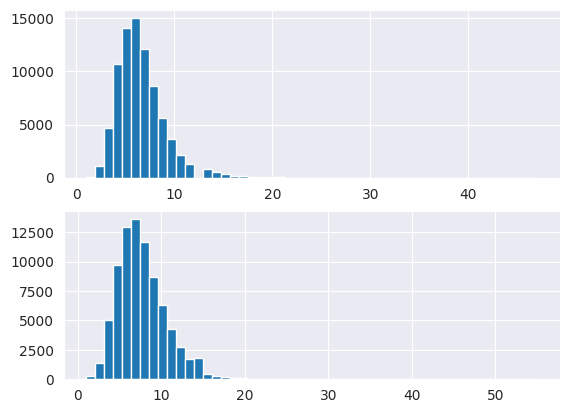

In [17]:
print("english")
eng_lens = [len(seq) for seq in train_encoder_input]
print("mean >> ",np.mean(eng_lens))
plt.subplot(2,1,1)
plt.hist(eng_lens,bins=50)


print("french")
fr_lens = [len(seq) for seq in train_decoder_input]
print("mean >> ",np.mean(fr_lens))
plt.subplot(2,1,2)
plt.hist(fr_lens,bins=50)
plt.show()

In [19]:
eng_sequence_size = 10
fr_sequence_size = 20

train_encoder_input = pad_sequences(train_encoder_input,padding='post',truncating='post',maxlen=eng_sequence_size)
test_encoder_input = pad_sequences(test_encoder_input,padding='post',truncating='post',maxlen=eng_sequence_size)

train_decoder_input = pad_sequences(train_decoder_input,padding='post',truncating='post',maxlen=fr_sequence_size)
train_decoder_label = pad_sequences(train_decoder_label,padding='post',truncating='post',maxlen=fr_sequence_size)

test_decoder_input = pad_sequences(test_decoder_input,padding='post',truncating='post',maxlen=fr_sequence_size)
test_decoder_label = pad_sequences(test_decoder_label,padding='post',truncating='post',maxlen=fr_sequence_size)

print("train dataset shape")
print(train_encoder_input.shape)
print(train_decoder_input.shape)
print(train_decoder_label.shape)

print("\n\ntest dataset shape")
print(test_encoder_input.shape)
print(test_decoder_input.shape)
print(test_decoder_label.shape)

train dataset shape
(81581, 10)
(81581, 20)
(81581, 20)


test dataset shape
(34963, 10)
(34963, 20)
(34963, 20)


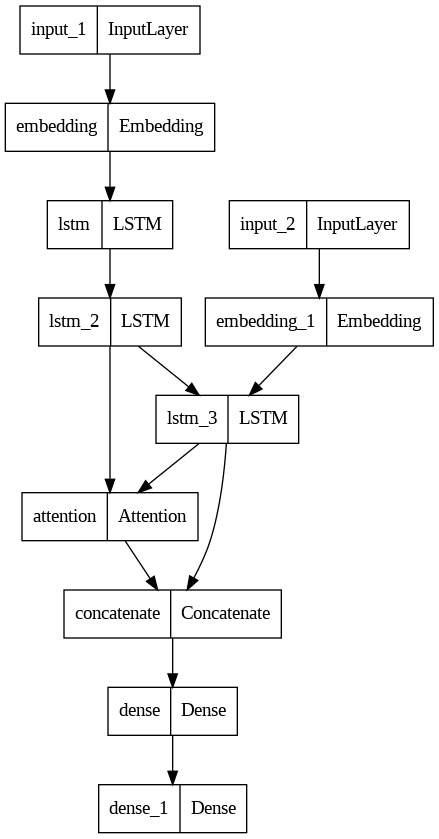

In [20]:
# Applying LSTM
from keras.layers import Input,Embedding,LSTM,Dense,Concatenate,Attention
from keras.models import Model
from keras.utils import plot_model
from keras import backend as K

#hyperparameters
embedding_size = 256
hidden_size = 256

# trainer model (generator model will use the same encoder tho)
encoder_input = Input(shape=[eng_sequence_size])
encoder_embedding = Embedding(eng_vocab_size,embedding_size,mask_zero=True)
encoder_embedded = encoder_embedding(encoder_input)

encoder_lstm1 = LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
encoder_output1,encoder_h1,encoder_c1 = encoder_lstm1(encoder_embedded)

encoder_lstm2 = LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
encoder_output2,encoder_h2,encoder_c2 = encoder_lstm2(encoder_output1)

encoder_lstm3 = LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
encoder_output3,encoder_h3,encoder_c3 = encoder_lstm3(encoder_output1)

decoder_input = Input(shape=(None,))
decoder_embedding = Embedding(fr_vocab_size,embedding_size,mask_zero=True)
decoder_embedded = decoder_embedding(decoder_input)

decoder_lstm = LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
decoder_output,_,_ = decoder_lstm(decoder_embedded,initial_state=[encoder_h3,encoder_c3])

attn_layer = Attention()
attn_context = attn_layer([decoder_output,encoder_output3])

decoder_output = Concatenate(axis=-1)([decoder_output,attn_context])
tanh_dense= Dense(hidden_size*2,activation=K.tanh)
decoder_output = tanh_dense(decoder_output)

softmax_dense = Dense(fr_vocab_size,activation='softmax')
decoder_output = softmax_dense(decoder_output)

trainer_model = Model([encoder_input,decoder_input],decoder_output)
trainer_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
plot_model(trainer_model)

In [21]:
# Training model
trainer_hist =trainer_model.fit([train_encoder_input,train_decoder_input],train_decoder_label,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
510/510 [==============================] - 1971s 4s/step - loss: 5.3003 - accuracy: 0.2136 - val_loss: 4.4106 - val_accuracy: 0.2856
Epoch 2/10
510/510 [==============================] - 1925s 4s/step - loss: 3.9690 - accuracy: 0.3320 - val_loss: 3.6630 - val_accuracy: 0.3684
Epoch 3/10
510/510 [==============================] - 1911s 4s/step - loss: 3.3138 - accuracy: 0.4016 - val_loss: 3.1714 - val_accuracy: 0.4324
Epoch 4/10
510/510 [==============================] - 1896s 4s/step - loss: 2.6793 - accuracy: 0.4869 - val_loss: 2.5981 - val_accuracy: 0.5281
Epoch 5/10
510/510 [==============================] - 1905s 4s/step - loss: 2.1190 - accuracy: 0.5754 - val_loss: 2.2874 - val_accuracy: 0.5830
Epoch 6/10
510/510 [==============================] - 1914s 4s/step - loss: 1.7667 - accuracy: 0.6285 - val_loss: 2.1412 - val_accuracy: 0.6104
Epoch 7/10
510/510 [==============================] - 1913s 4s/step - loss: 1.5271 - accuracy: 0.6671 - val_loss: 2.0525 - val_accuracy:

In [23]:
trainer_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 10, 256)      1536256     ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 10, 256),    525312      ['embedding[0][0]']              
                                 (None, 256),                                                 

In [26]:
import matplotlib.pyplot as plt

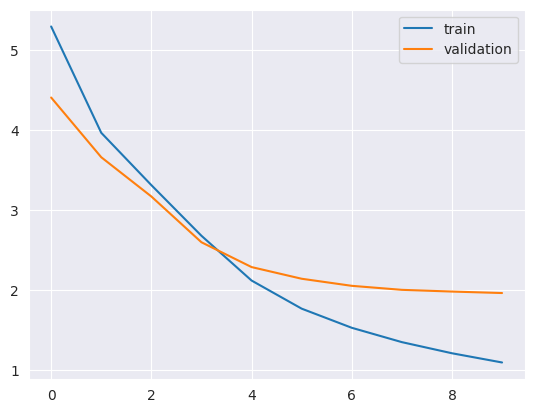

In [28]:
plt.plot(trainer_hist.history['loss'])
plt.plot(trainer_hist.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

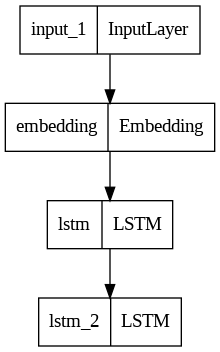

In [29]:
#generator model
gen_encoder = Model([encoder_input],[encoder_output3,encoder_h3,encoder_c3])

gen_decoder_values_input = Input(shape=(eng_sequence_size,hidden_size))
gen_decoder_h_input = Input(shape=[hidden_size])
gen_decoder_c_input = Input(shape=[hidden_size])

gen_decoder_embedded = decoder_embedding(decoder_input)
gen_decoder_output,gen_decoder_h,gen_decoder_c = decoder_lstm(gen_decoder_embedded,initial_state=[gen_decoder_h_input,gen_decoder_c_input])

attn_context = attn_layer([gen_decoder_output,gen_decoder_values_input])
gen_decoder_output = Concatenate(axis=-1)([gen_decoder_output,attn_context])

gen_decoder_output = tanh_dense(gen_decoder_output)
gen_decoder_output = softmax_dense(gen_decoder_output)

gen_decoder = Model([decoder_input]+[gen_decoder_values_input,gen_decoder_h_input,gen_decoder_c_input],[gen_decoder_output,gen_decoder_h,gen_decoder_c])
plot_model(gen_encoder)

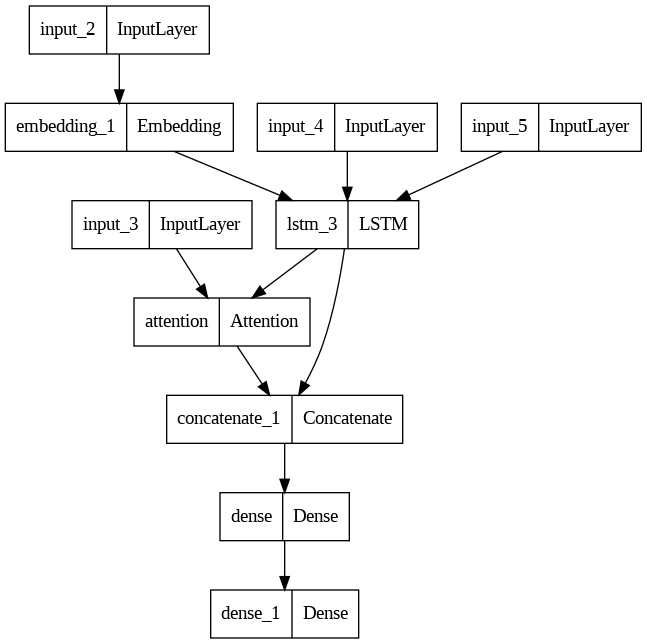

In [30]:
plot_model(gen_decoder)

In [31]:
def seq2eng(seq):
    ret =[]
    for n in seq:
        if n != 0:
            ret.append(eng_tok.index_word[n])
    ret = ' '.join(ret)
    return ret

def seq2fr(seq):
    ret =[]
    for n in seq:
        if n != 0 and fr_tok.index_word[n] != 'eostoken':
            ret.append(fr_tok.index_word[n])
    ret = ' '.join(ret)
    return ret
def generate_from_encoder_input(encoder_input):
    encoder_input = encoder_input.reshape(1,-1)
    values,h,c = gen_encoder.predict(encoder_input)

    single_tok = np.zeros((1,1))
    single_tok[0,0] = fr_tok.word_index['sostoken']
    decoder_input = single_tok

    generated = []
    count = 0
    while(True):
        decoder_output,new_h,new_c = gen_decoder.predict([decoder_input]+[values,h,c])
        count +=1

        sampled_index = np.argmax(decoder_output[0,-1,:])
        sampled_word = fr_tok.index_word[sampled_index]

        if sampled_word != 'eostoken' and sampled_index != 0:
            generated.append(sampled_word)
        if count >= fr_sequence_size or sampled_word == 'eostoken':
            break

        h,c = new_h,new_c
        decoder_input[0,0] = sampled_index

    generated = ' '.join(generated)
    return generated

In [32]:
for i in range(520,525):
    print("\n<<sample encoder input english sentence>>")
    print(seq2eng(train_encoder_input[i]))
    print("\n")
    print("<<sample generated french sentence>>")
    print(generate_from_encoder_input(train_encoder_input[i]))
    print("\n")
    print("<<answer french sentence>>")
    print(seq2fr(train_decoder_label[i]))
    print("========================================\n")


<<sample encoder input english sentence>>
we have somewhere else to go


<<sample generated french sentence>>
1/1 [==============================] - 0s 33ms/step
nous avons quelque chose d'autre à y aller


<<answer french sentence>>
nous avons un autre endroit où aller


<<sample encoder input english sentence>>
let us end this debate


<<sample generated french sentence>>
1/1 [==============================] - 0s 28ms/step
finissons en


<<answer french sentence>>
finissons ce débat


<<sample encoder input english sentence>>
it rained three days on end


<<sample generated french sentence>>
1/1 [==============================] - 0s 30ms/step
il a plu trois jours sur le programme


<<answer french sentence>>
il a plu les trois derniers jours


<<sample encoder input english sentence>>
i am not home right now


<<sample generated french sentence>>
1/1 [==============================] - 0s 28ms/step
je ne suis pas chez moi maintenant


<<answer french sentence>>
je ne suis pas chez mo

In [36]:
idx = [24,1525,666,2222,52212]

print("     Testing...    ")
for i in idx:
    print("\nINPUT ENG>>")
    print(seq2eng(train_encoder_input[i]))
    print("\n")
    print("GENERATED FR>>")
    print(generate_from_encoder_input(train_encoder_input[i]))
    print("\n")
    print("ANSWER FR>>")
    print(seq2fr(train_decoder_label[i]))
    print("=====================================================================\n")

     Testing...    

INPUT ENG>>
i am realistic


GENERATED FR>>
1/1 [==============================] - 0s 28ms/step
je suis réaliste


ANSWER FR>>
je suis réaliste


INPUT ENG>>
we are not officially dating


GENERATED FR>>
1/1 [==============================] - 0s 27ms/step
nous ne sommes pas ensemble officiellement


ANSWER FR>>
on ne sort pas ensemble officiellement


INPUT ENG>>
she stood by him


GENERATED FR>>
1/1 [==============================] - 0s 26ms/step
elle se tenait par lui même


ANSWER FR>>
elle se tenait à côté de lui


INPUT ENG>>
i am used to driving on the left


GENERATED FR>>
1/1 [==============================] - 0s 45ms/step
je suis habitué à conduire à gauche


ANSWER FR>>
je suis habituée à conduire à gauche


INPUT ENG>>
tom is the champion


GENERATED FR>>
1/1 [==============================] - 0s 43ms/step
tom est le champion de dieu


ANSWER FR>>
tom est le champion en titre

